In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load the data, keep values of "NONE"
df = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D208_medical_raw.csv', keep_default_na=False)

In [3]:
#Rename survey response variables
df.rename(columns = {
    'Item1':'Timely_admission',
    'Item2':'Timely_treatment',
    'Item3':'Timely_visits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'Hours_of_treament',
    'Item7':'Courteous_staff',
    'Item8':'Active_listening'},
    inplace=True)

In [4]:
# Summarize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Assess for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# Assess for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Store quantitative variables
medical_quant=df.select_dtypes(include=[np.number])

<Axes: >

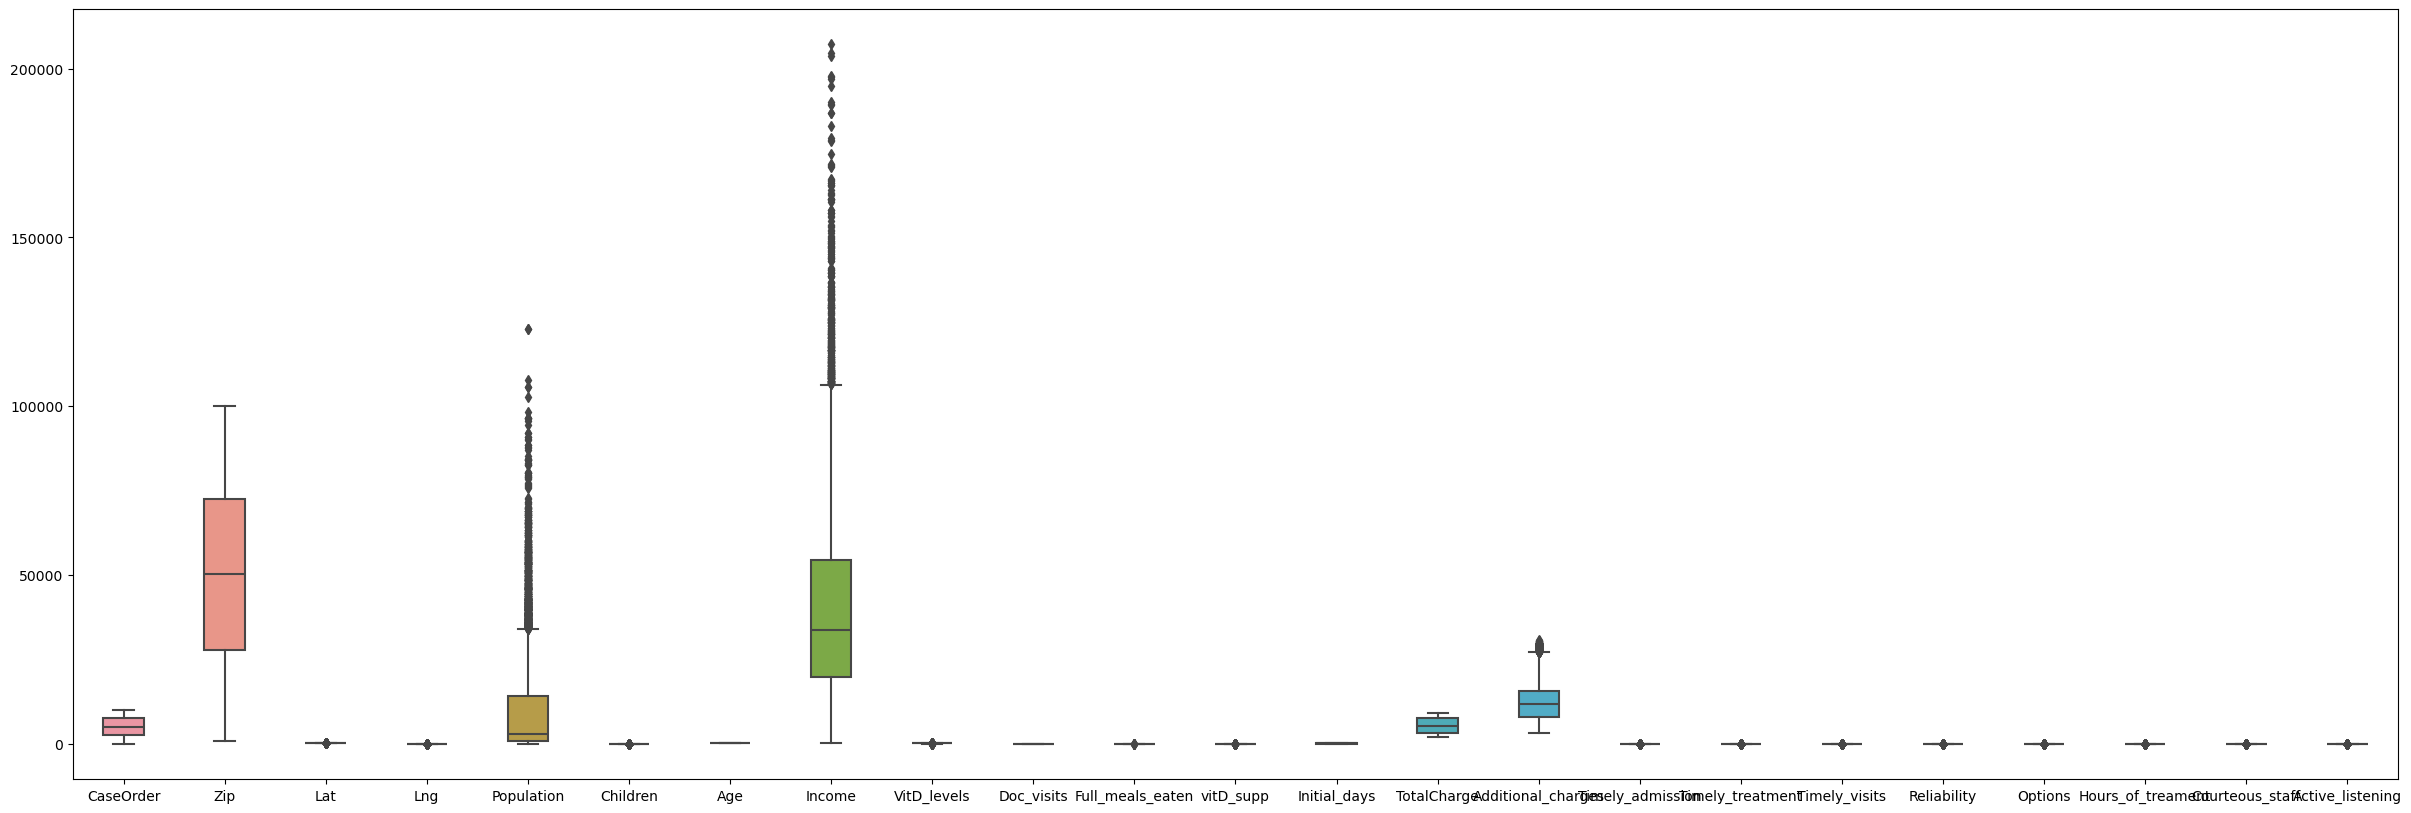

In [8]:
# Create seaborn boxplots of quantitative variables
plt.subplots(figsize=(30, 10))
sns.boxplot(data=medical_quant, width=0.4)

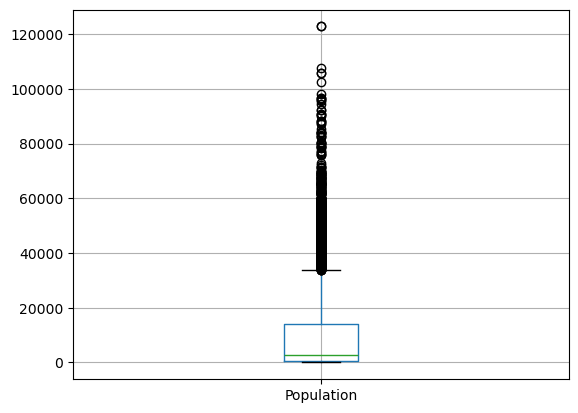

In [9]:
# Create boxplots for variables with outliers: Population, Income, & Additional_charges
# Start by creating boxplot of Population
population_bp=df.boxplot(column=['Population'])

In [10]:
pop_query = df.query('Population > 35000')
pop_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 8 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           805 non-null    int64  
 1   Customer_id         805 non-null    object 
 2   Interaction         805 non-null    object 
 3   UID                 805 non-null    object 
 4   City                805 non-null    object 
 5   State               805 non-null    object 
 6   County              805 non-null    object 
 7   Zip                 805 non-null    int64  
 8   Lat                 805 non-null    float64
 9   Lng                 805 non-null    float64
 10  Population          805 non-null    int64  
 11  Area                805 non-null    object 
 12  TimeZone            805 non-null    object 
 13  Job                 805 non-null    object 
 14  Children            805 non-null    int64  
 15  Age                 805 non-null    int64  
 16  Income      

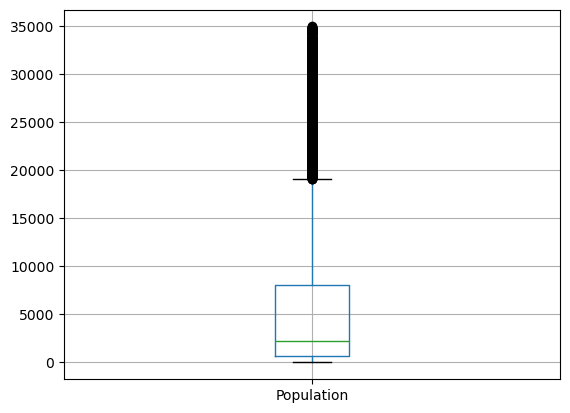

In [11]:
# Replace outliers with nulls
df['Population']=np.where(df['Population']>35000,np.nan,df['Population'])

# Impute nulls with median
df['Population'].fillna(df['Population'].median(), inplace=True)

#Confirm values are below 35000
population_bp=df.boxplot(column=['Population'])

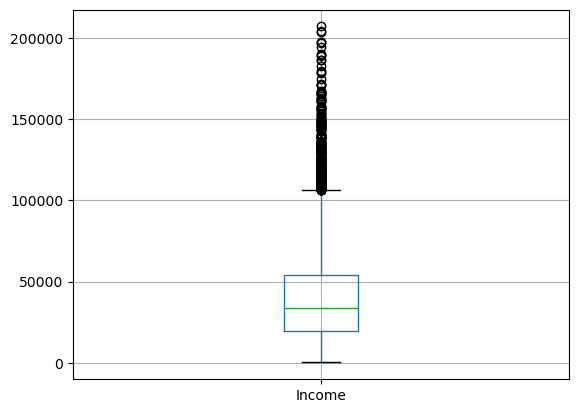

In [12]:
# Create boxplot of Income
income_bp=df.boxplot(column=['Income'])

In [13]:
income_query = df.query('Income > 110000')
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 30 to 9955
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           274 non-null    int64  
 1   Customer_id         274 non-null    object 
 2   Interaction         274 non-null    object 
 3   UID                 274 non-null    object 
 4   City                274 non-null    object 
 5   State               274 non-null    object 
 6   County              274 non-null    object 
 7   Zip                 274 non-null    int64  
 8   Lat                 274 non-null    float64
 9   Lng                 274 non-null    float64
 10  Population          274 non-null    float64
 11  Area                274 non-null    object 
 12  TimeZone            274 non-null    object 
 13  Job                 274 non-null    object 
 14  Children            274 non-null    int64  
 15  Age                 274 non-null    int64  
 16  Income     

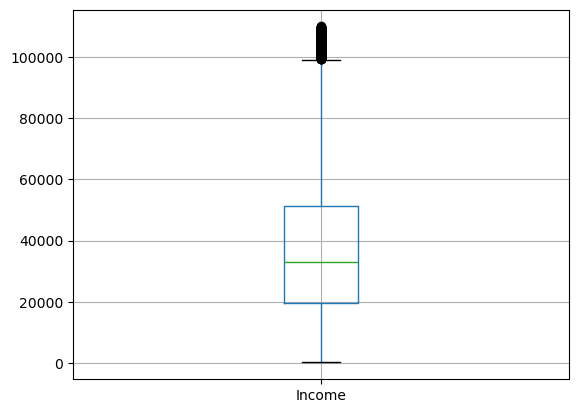

In [14]:
# Replace outliers with nulls
df['Income']=np.where(df['Income']>110000,np.nan,df['Income'])

# Impute nulls with median
df['Income'].fillna(df['Income'].median(), inplace=True)

# Confirm values are below 110000
income_bp=df.boxplot(column=['Income'])

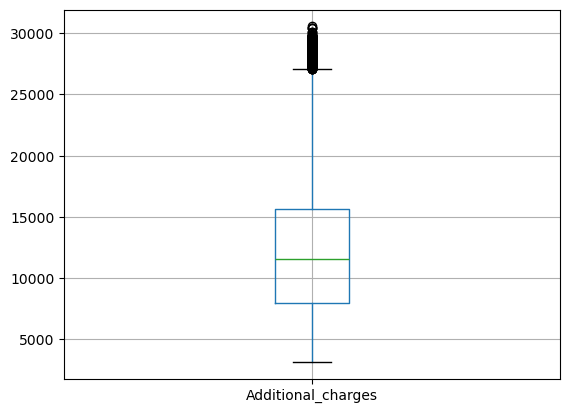

In [15]:
# Create boxplot of Additional_charges
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [16]:
add_query = df.query('Additional_charges > 27000')
add_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 20 to 9996
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           432 non-null    int64  
 1   Customer_id         432 non-null    object 
 2   Interaction         432 non-null    object 
 3   UID                 432 non-null    object 
 4   City                432 non-null    object 
 5   State               432 non-null    object 
 6   County              432 non-null    object 
 7   Zip                 432 non-null    int64  
 8   Lat                 432 non-null    float64
 9   Lng                 432 non-null    float64
 10  Population          432 non-null    float64
 11  Area                432 non-null    object 
 12  TimeZone            432 non-null    object 
 13  Job                 432 non-null    object 
 14  Children            432 non-null    int64  
 15  Age                 432 non-null    int64  
 16  Income     

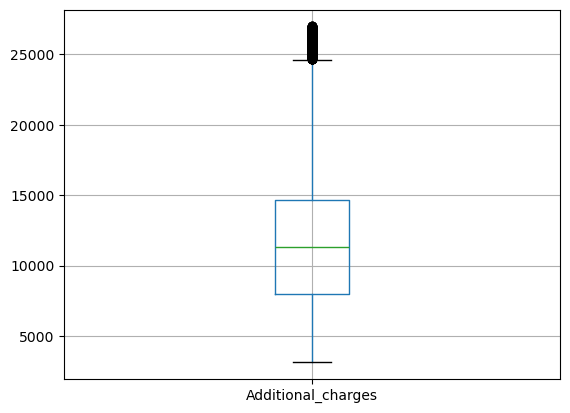

In [17]:
# Replace outliers with nulls
df['Additional_charges']=np.where(df['Additional_charges']>27000,np.nan,df['Additional_charges'])

# Impute nulls with median
df['Additional_charges'].fillna(df['Additional_charges'].median(), inplace=True)

#Confirm values are below 27000
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [18]:
#'Timely_treatment' & 'Active_listening' variables are expressed numerically
# I want to transform the 1-8 scale to least-to-most important
# First will replicate the variables
df['Timely_treatment_new'] = df['Timely_treatment']
df['Active_listening_new'] = df['Active_listening']

In [19]:
# Set up dictionary to switch scale
dict_treatment = {"Timely_treatment_new": {1:8, 2:7, 3:6, 4:5, 5:4, 6:3, 7:2, 8:1}}
dict_listening = {"Active_listening_new": {1:8, 2:7, 3:6, 4:5, 5:4, 6:3, 7:2, 8:1}}

In [20]:
# Replace variables using dictionary
df.replace(dict_treatment, inplace=True)
df.replace(dict_listening, inplace=True)

In [21]:
# Verify re-expression with frequency tables
df['Timely_treatment'].value_counts(normalize=True)

Timely_treatment
3    0.3439
4    0.3351
5    0.1421
2    0.1360
1    0.0213
6    0.0204
7    0.0012
Name: proportion, dtype: float64

In [22]:
df['Timely_treatment_new'].value_counts(normalize=True)

Timely_treatment_new
6    0.3439
5    0.3351
4    0.1421
7    0.1360
8    0.0213
3    0.0204
2    0.0012
Name: proportion, dtype: float64

In [23]:
df['Active_listening'].value_counts(normalize=True)

Active_listening
3    0.3401
4    0.3337
5    0.1429
2    0.1391
6    0.0221
1    0.0209
7    0.0012
Name: proportion, dtype: float64

In [24]:
df['Active_listening_new'].value_counts(normalize=True)

Active_listening_new
6    0.3401
5    0.3337
4    0.1429
7    0.1391
3    0.0221
8    0.0209
2    0.0012
Name: proportion, dtype: float64

In [25]:
# Check summary of data again, confirm new variables are included
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [26]:
# Create new data frame with relevant columns
df = df[[
    'ReAdmis',
    'Children',
    'Age',
    'Income',
    'VitD_levels',
    'Doc_visits',
    'Full_meals_eaten',
    'vitD_supp',
    'Initial_days',
    'TotalCharge',
    'Additional_charges',
    'Timely_treatment_new',
    'Active_listening_new']]

In [27]:
#Summary statistics of continuous variables
df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Timely_treatment_new,Active_listening_new
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,37717.986900,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12199.658920,5.493300,5.490300
std,2.163659,20.638538,23547.400893,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,5670.050042,1.034825,1.042312
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,2.000000,2.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,5.000000,5.000000
50%,1.000000,53.000000,32888.840000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11293.773115,6.000000,6.000000
75%,3.000000,71.000000,51401.530000,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,14644.120000,6.000000,6.000000
max,10.000000,89.000000,109948.460000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,26986.140460,8.000000,8.000000


In [28]:
#Summary statistics of categorical variable (Readmission)
df['ReAdmis'].value_counts(normalize=True)

ReAdmis
No     0.6331
Yes    0.3669
Name: proportion, dtype: float64

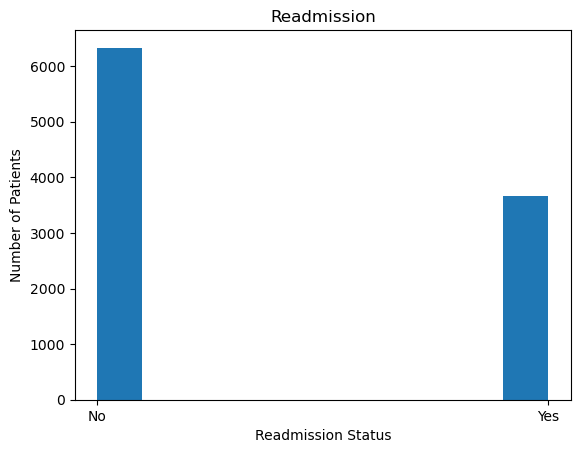

In [29]:
#Univariate statistics - Target variable (Readmission)
plt.hist(df.ReAdmis)
plt.title('Readmission')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.show()

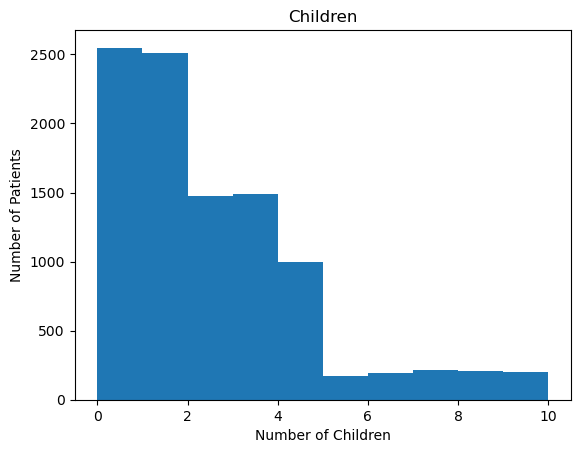

In [30]:
#Univariate statistics - 12 Predictor variables
#1. Children
plt.hist(df.Children)
plt.title('Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Patients')
plt.show()

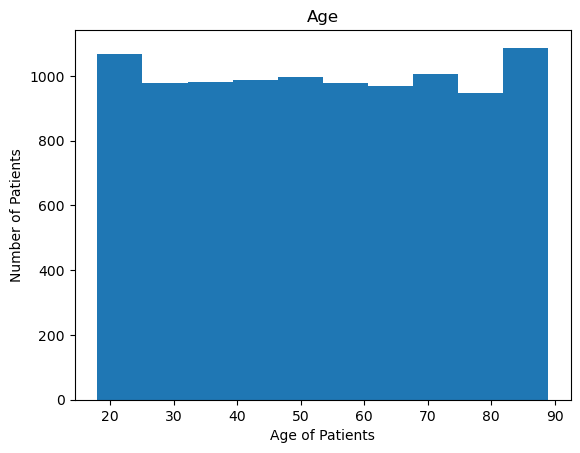

In [31]:
#2. Age
plt.hist(df.Age)
plt.title('Age')
plt.xlabel('Age of Patients')
plt.ylabel('Number of Patients')
plt.show()

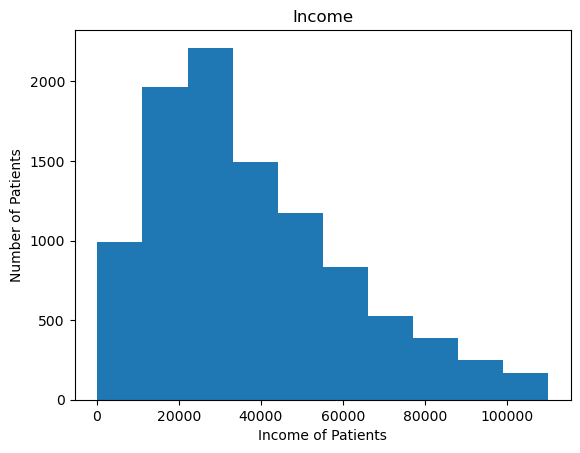

In [32]:
#3. Income
plt.hist(df.Income)
plt.title('Income')
plt.xlabel('Income of Patients')
plt.ylabel('Number of Patients')
plt.show()

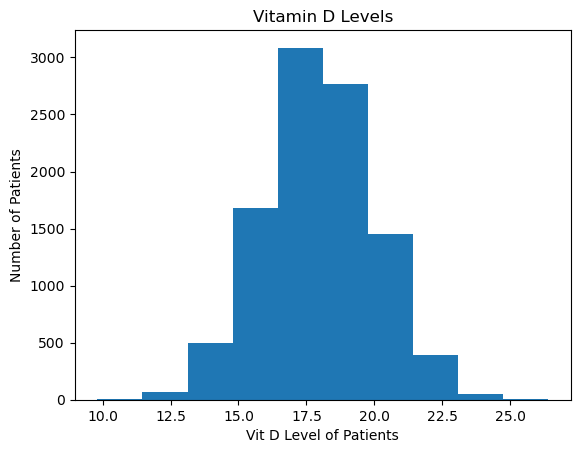

In [33]:
#4. Vitamin D levels
plt.hist(df.VitD_levels)
plt.title('Vitamin D Levels')
plt.xlabel('Vit D Level of Patients')
plt.ylabel('Number of Patients')
plt.show()

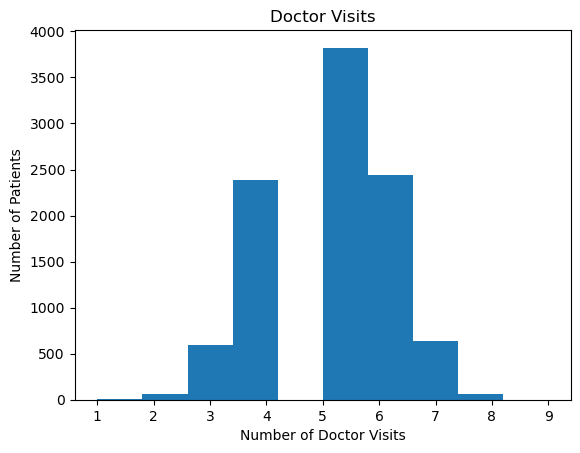

In [34]:
#5. Doctor visits
plt.hist(df.Doc_visits)
plt.title('Doctor Visits')
plt.xlabel('Number of Doctor Visits')
plt.ylabel('Number of Patients')
plt.show()

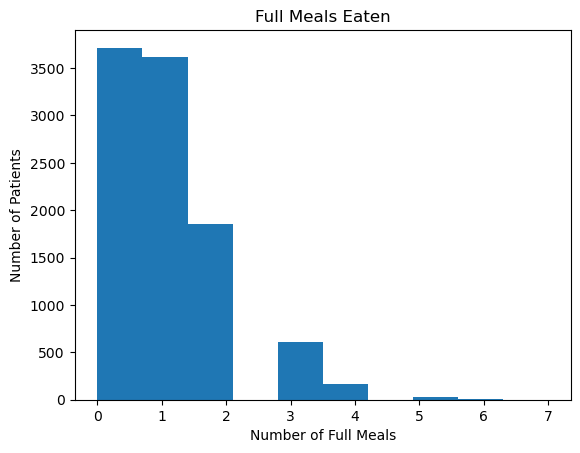

In [35]:
#6. Fulls meals
plt.hist(df.Full_meals_eaten)
plt.title('Full Meals Eaten')
plt.xlabel('Number of Full Meals')
plt.ylabel('Number of Patients')
plt.show()

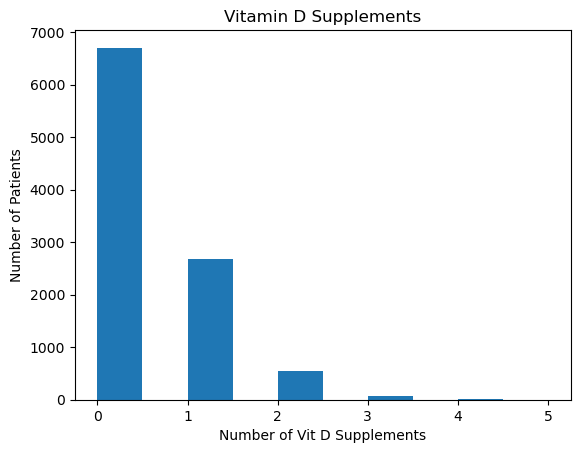

In [36]:
#7. Vitamine D supplements
plt.hist(df.vitD_supp)
plt.title('Vitamin D Supplements')
plt.xlabel('Number of Vit D Supplements')
plt.ylabel('Number of Patients')
plt.show()

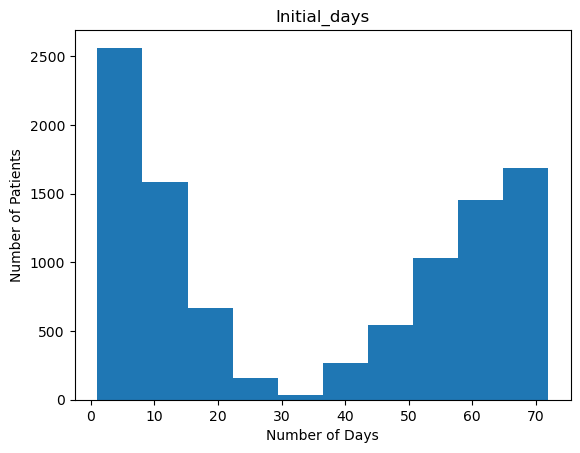

In [37]:
#8. Initial Days
plt.hist(df.Initial_days)
plt.title('Initial_days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Patients')
plt.show()

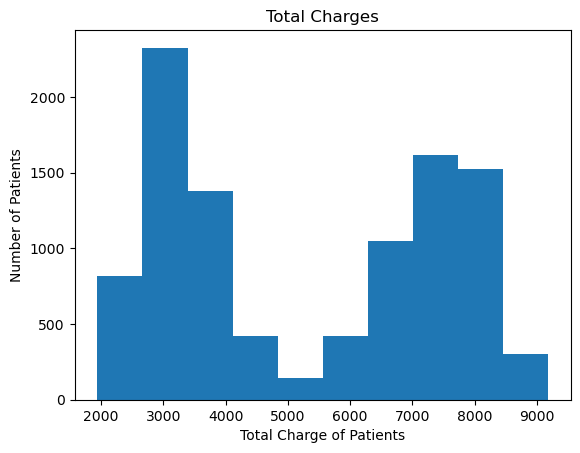

In [38]:
#9. Total charges
plt.hist(df.TotalCharge)
plt.title('Total Charges')
plt.xlabel('Total Charge of Patients')
plt.ylabel('Number of Patients')
plt.show()

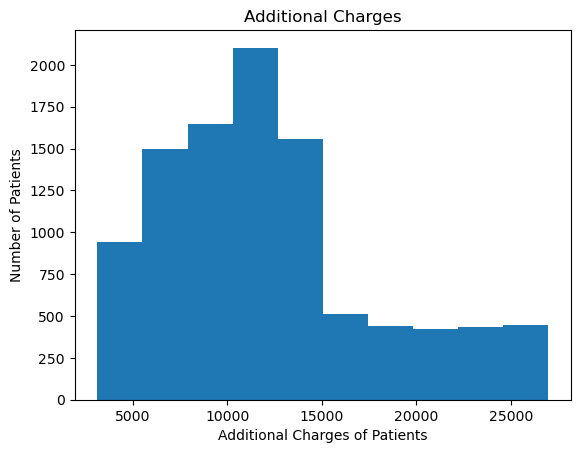

In [39]:
#10. Additional charges
plt.hist(df.Additional_charges)
plt.title('Additional Charges')
plt.xlabel('Additional Charges of Patients')
plt.ylabel('Number of Patients')
plt.show()

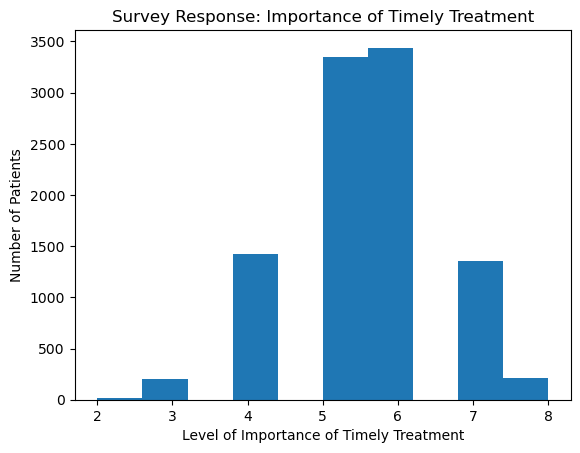

In [40]:
#11. Timely treatments
plt.hist(df.Timely_treatment_new)
plt.title('Survey Response: Importance of Timely Treatment')
plt.xlabel('Level of Importance of Timely Treatment')
plt.ylabel('Number of Patients')
plt.show()

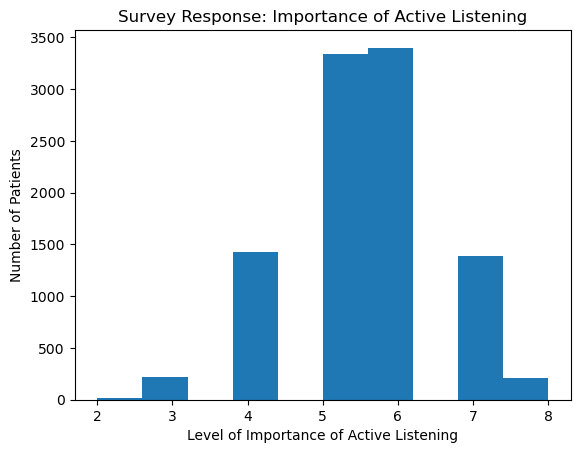

In [41]:
#12. Active Listening
plt.hist(df.Active_listening_new)
plt.title('Survey Response: Importance of Active Listening')
plt.xlabel('Level of Importance of Active Listening')
plt.ylabel('Number of Patients')
plt.show()

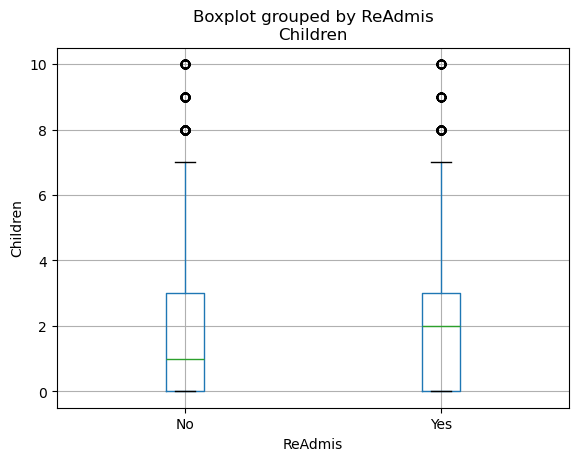

In [42]:
#Bivariate boxplots with 12 predictor variables
# 1. Readmission x Children
df.boxplot(column = 'Children', by = 'ReAdmis')
plt.title('Children')
plt.ylabel('Children')
plt.show()

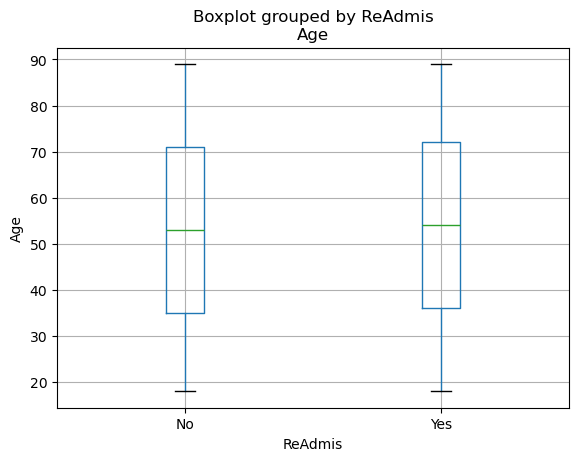

In [43]:
# 2. Readmission x Age
df.boxplot(column = 'Age', by = 'ReAdmis')
plt.title('Age')
plt.ylabel('Age')
plt.show()

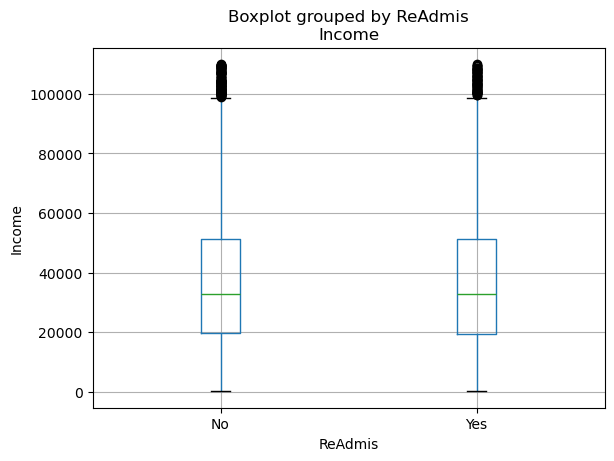

In [44]:
# 3. Readmission x Income
df.boxplot(column = 'Income', by = 'ReAdmis')
plt.title('Income')
plt.ylabel('Income')
plt.show()

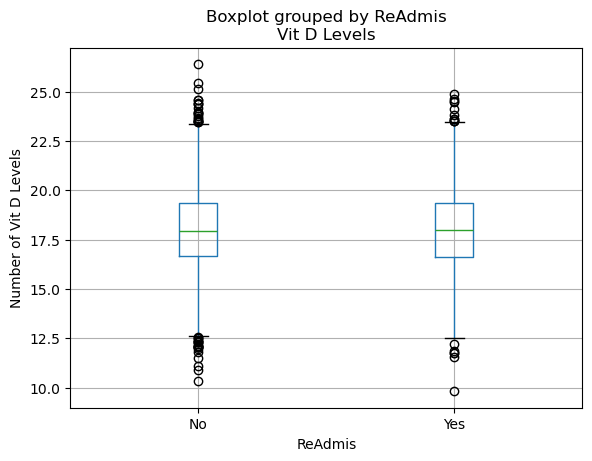

In [45]:
# 4. Readmission x Vitamin D levels
df.boxplot(column = 'VitD_levels', by = 'ReAdmis')
plt.title('Vit D Levels')
plt.ylabel('Number of Vit D Levels')
plt.show()

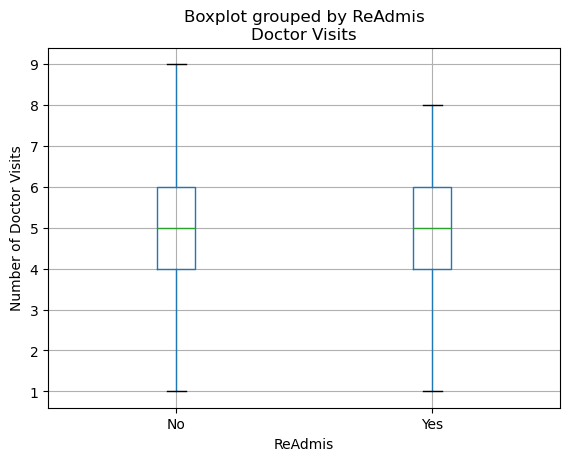

In [46]:
# 5. Readmission x Doctor visits
df.boxplot(column = 'Doc_visits', by = 'ReAdmis')
plt.title('Doctor Visits')
plt.ylabel('Number of Doctor Visits')
plt.show()

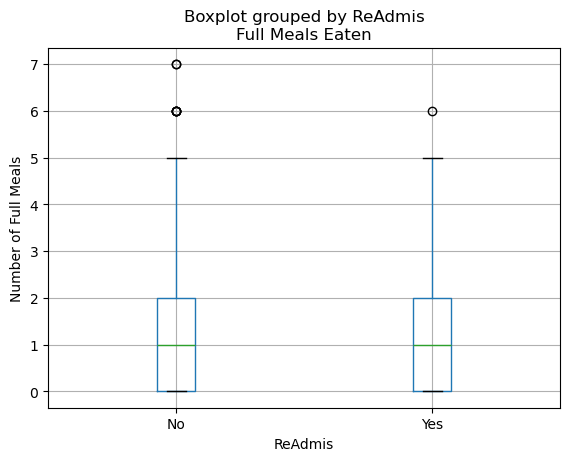

In [47]:
# 6. Readmission x Full meals eaten
df.boxplot(column = 'Full_meals_eaten', by = 'ReAdmis')
plt.title('Full Meals Eaten')
plt.ylabel('Number of Full Meals')
plt.show()

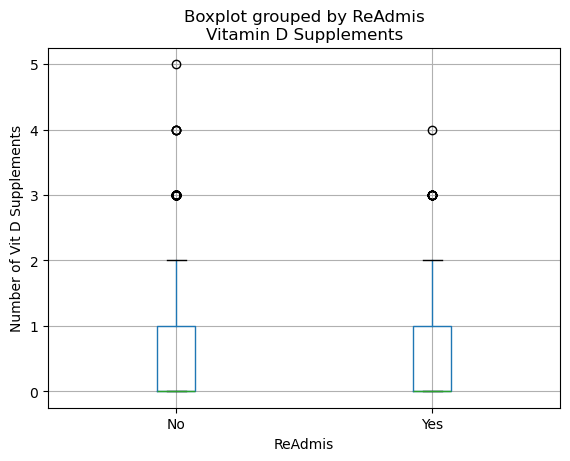

In [48]:
# 7. Readmission x Vitamin D supplements
df.boxplot(column = 'vitD_supp', by = 'ReAdmis')
plt.title('Vitamin D Supplements')
plt.ylabel('Number of Vit D Supplements')
plt.show()

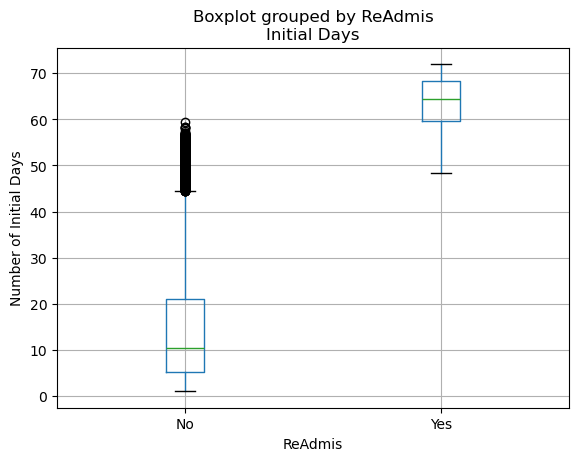

In [49]:
# 8. Readmission x Initial days
df.boxplot(column = 'Initial_days', by = 'ReAdmis')
plt.title('Initial Days')
plt.ylabel('Number of Initial Days')
plt.show()

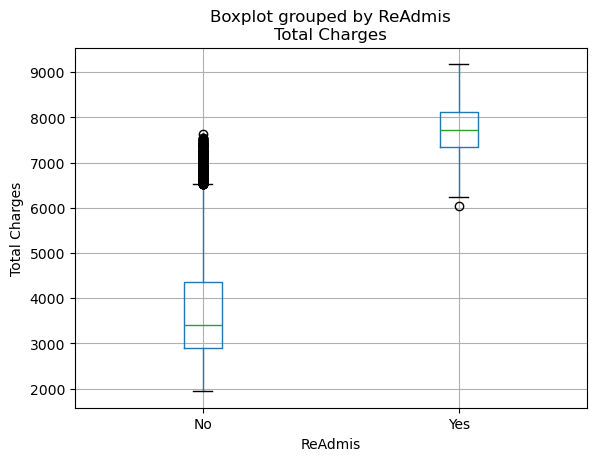

In [50]:
# 9. Readmission x Total charges
df.boxplot(column = 'TotalCharge', by = 'ReAdmis')
plt.title('Total Charges')
plt.ylabel('Total Charges')
plt.show()

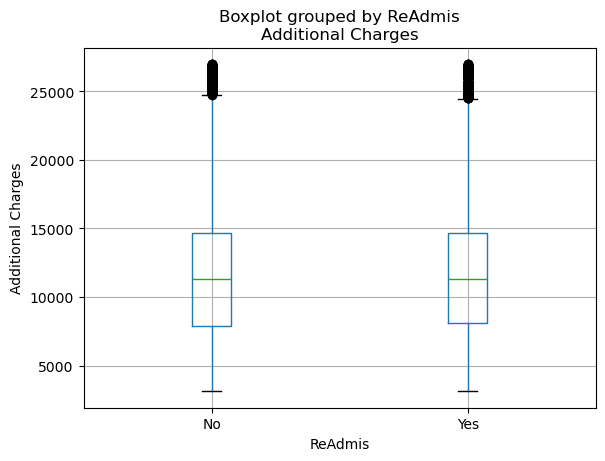

In [51]:
# 10. Readmission x Additional charges
df.boxplot(column = 'Additional_charges', by = 'ReAdmis')
plt.title('Additional Charges')
plt.ylabel('Additional Charges')
plt.show()

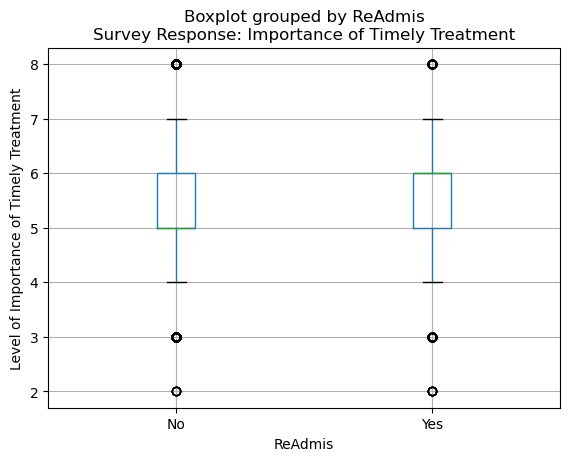

In [52]:
# 11. Readmission x Timely treatment
df.boxplot(column = 'Timely_treatment_new', by = 'ReAdmis')
plt.title('Survey Response: Importance of Timely Treatment')
plt.ylabel('Level of Importance of Timely Treatment')
plt.show()

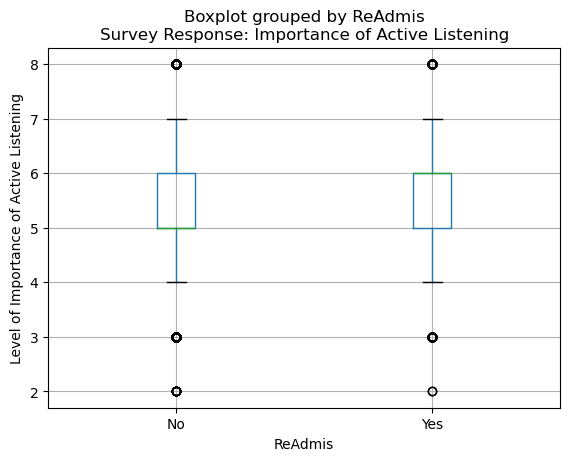

In [53]:
# 12. Readmission x Active listening
df.boxplot(column = 'Active_listening_new', by = 'ReAdmis')
plt.title('Survey Response: Importance of Active Listening')
plt.ylabel('Level of Importance of Active Listening')
plt.show()

In [54]:
# Re-express categorical variable (target) as numeric
df.ReAdmis.replace(('Yes', 'No'), (1, 0), inplace=True)

In [55]:
# Confirm re-expression was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReAdmis               10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   VitD_levels           10000 non-null  float64
 5   Doc_visits            10000 non-null  int64  
 6   Full_meals_eaten      10000 non-null  int64  
 7   vitD_supp             10000 non-null  int64  
 8   Initial_days          10000 non-null  float64
 9   TotalCharge           10000 non-null  float64
 10  Additional_charges    10000 non-null  float64
 11  Timely_treatment_new  10000 non-null  int64  
 12  Active_listening_new  10000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1015.8 KB


In [56]:
#Save output to csv file
df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D208_PA2_MV_clean.csv')

In [57]:
# Initial model
from statsmodels.formula.api import logit
initial_model = logit(
    'ReAdmis ~ Children + Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + Initial_days + TotalCharge + Additional_charges + Timely_treatment_new + Active_listening_new',
    data = df).fit()

Optimization terminated successfully.
         Current function value: 0.044523
         Iterations 13


In [58]:
print(initial_model.params)

Intercept              -63.889141
Children                 0.058111
Age                     -0.009594
Income                  -0.000003
VitD_levels              0.032335
Doc_visits              -0.018655
Full_meals_eaten         0.018660
vitD_supp               -0.031002
Initial_days             0.917123
TotalCharge              0.001954
Additional_charges       0.000051
Timely_treatment_new    -0.197500
Active_listening_new     0.178331
dtype: float64


In [59]:
print(initial_model.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9323
Time:                        21:51:09   Log-Likelihood:                -445.23
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -63.8891      3.241    -19.711      0.000     -70.242     -57.536
Children                 0.0581      0.039      1.492      0.136      -0.018       0.134
Age         

In [60]:
# 1. Assess for multicollinearity using VIF for all predictor variables
# VIF code from Dr. Sewell's lecture slides (Episode 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Set independent variable set as X
X = df[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','TotalCharge','Additional_charges','Timely_treatment_new','Active_listening_new']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0               Children    1.937853
1                    Age   12.565209
2                 Income    3.516794
3            VitD_levels   51.604746
4             Doc_visits   21.527192
5       Full_meals_eaten    1.987709
6              vitD_supp    1.402514
7           Initial_days   88.601798
8            TotalCharge  221.039117
9     Additional_charges    9.545015
10  Timely_treatment_new   28.309504
11  Active_listening_new   28.436883


In [61]:
# 2. Remove variable with highest VIF > 10: Total Charge
# Check VIF again for remaining variables
X = df[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','Additional_charges','Timely_treatment_new','Active_listening_new']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0               Children   1.934975
1                    Age  12.548775
2                 Income   3.503137
3            VitD_levels  41.589494
4             Doc_visits  20.639973
5       Full_meals_eaten   1.984324
6              vitD_supp   1.401023
7           Initial_days   2.692281
8     Additional_charges   9.242554
9   Timely_treatment_new  27.571033
10  Active_listening_new  27.671562


In [62]:
# 3. Remove variable with highest VIF > 10: Vit D levels
# Check VIF again for remaining variables
X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','Additional_charges','Timely_treatment_new','Active_listening_new']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                feature        VIF
0              Children   1.925218
1                   Age  12.361812
2                Income   3.461335
3            Doc_visits  17.253988
4      Full_meals_eaten   1.968976
5             vitD_supp   1.399067
6          Initial_days   2.669554
7    Additional_charges   9.213277
8  Timely_treatment_new  24.566471
9  Active_listening_new  24.330399


In [63]:
# 4. Remove variable with highest VIF > 10: Timely treatment
# Check VIF again for remaining variables
X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','Additional_charges','Active_listening_new']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                feature        VIF
0              Children   1.922118
1                   Age  12.284130
2                Income   3.411477
3            Doc_visits  15.558857
4      Full_meals_eaten   1.963846
5             vitD_supp   1.397498
6          Initial_days   2.653710
7    Additional_charges   9.193304
8  Active_listening_new  16.486127


In [64]:
# 5. Remove variable with highest VIF > 10: Active listening
# Check VIF again for remaining variables
X = df[['Children','Age','Income','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','Additional_charges']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

              feature        VIF
0            Children   1.897290
1                 Age  11.894763
2              Income   3.329444
3          Doc_visits   9.404189
4    Full_meals_eaten   1.933302
5           vitD_supp   1.390995
6        Initial_days   2.597194
7  Additional_charges   9.160854


In [65]:
# 6. Remove variable with highest VIF > 10: Age
# Check VIF again for remaining variables
X = df[['Children','Income','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','Additional_charges']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

              feature       VIF
0            Children  1.894215
1              Income  3.313253
2          Doc_visits  8.353872
3    Full_meals_eaten  1.930197
4           vitD_supp  1.388558
5        Initial_days  2.583487
6  Additional_charges  4.925311


In [66]:
# First reduced model with remaining variables
reduced1_model = logit(
'ReAdmis ~ Children + Income + Doc_visits + Full_meals_eaten + vitD_supp + Initial_days + Additional_charges',
    data = df).fit()

print(reduced1_model.summary())

Optimization terminated successfully.
         Current function value: 0.048296
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9265
Time:                        21:51:10   Log-Likelihood:                -482.96
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.6608      2.526    -21.639      0.000     -59.612     -49.710
Chil

In [67]:
# Second reduced model (remove Doctor visits)
reduced2_model = logit(
'ReAdmis ~ Children + Income + Full_meals_eaten + vitD_supp + Initial_days + Additional_charges',
    data = df).fit()

print(reduced2_model.summary())

Optimization terminated successfully.
         Current function value: 0.048299
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9265
Time:                        21:51:10   Log-Likelihood:                -482.99
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.5863      2.505    -21.792      0.000     -59.496     -49.677
Chil

In [68]:
# Third reduced model (remove Vit D supplements)
reduced3_model = logit(
'ReAdmis ~ Children + Income + Full_meals_eaten + Initial_days + Additional_charges',
    data = df).fit()

print(reduced3_model.summary())

Optimization terminated successfully.
         Current function value: 0.048311
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9265
Time:                        21:51:10   Log-Likelihood:                -483.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.6011      2.504    -21.808      0.000     -59.508     -49.694
Chil

In [69]:
# Fourth reduced model (remove Full meals eaten)
reduced4_model = logit(
'ReAdmis ~ Children + Income + Initial_days + Additional_charges',
    data = df).fit()

print(reduced4_model.summary())

Optimization terminated successfully.
         Current function value: 0.048333
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9265
Time:                        21:51:10   Log-Likelihood:                -483.33
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.5382      2.501    -21.808      0.000     -59.440     -49.637
Chil

In [70]:
# Fifth reduced model (remove Income)
reduced5_model = logit(
'ReAdmis ~ Children + Initial_days + Additional_charges',
    data = df).fit()

print(reduced5_model.summary())

Optimization terminated successfully.
         Current function value: 0.048381
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9264
Time:                        21:51:10   Log-Likelihood:                -483.81
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.5508      2.498    -21.842      0.000     -59.446     -49.656
Chil

In [71]:
# Final model (remove Children)
final_model = logit(
'ReAdmis ~ Initial_days + Additional_charges',
    data = df).fit()

print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.048519
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.9262
Time:                        21:51:10   Log-Likelihood:                -485.19
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.3312      2.485    -21.865      0.000     -59.201     -49.461
Init

In [72]:
print(final_model.params)

Intercept            -54.331214
Initial_days           0.991019
Additional_charges     0.000041
dtype: float64


In [73]:
conf_matx = final_model.pred_table()
print(conf_matx)

[[6219.  112.]
 [ 106. 3563.]]


In [74]:
TN = 6219
TP = 3563
FN = 106
FP = 112
accuracy = (TN + TP)/(TN+FN+FP+TP)
print('Accuracy:', accuracy)

Accuracy: 0.9782
